In [1]:
import numpy as np
import pandas as pd
import fs_qe as fq

# 1 data process

The imported sample is constructed with the strategy that picking up the top 1% US firms for each year from 2018 to 2013. For details, please see the file ``01``.

In [4]:
df, df2, df3, df4 = fq.dataprocess(file='data/USA19-13_top1.csv', var1='lognoe', var2='noe', var3='noe_mean')

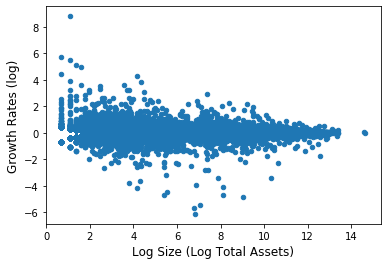

In [5]:
fq.scatterplot(df, x='lognoe', xlabel='Log Size (Log Total Assets)')

In [6]:
df5 = df2[df2['quantile_ex_1'] == pd.Interval(0.692, 3.296, closed='right') ]
df6 = df2[df2['quantile_ex_1'] == pd.Interval(3.296, 4.369, closed='right') ]
df7 = df2[df2['quantile_ex_1'] == pd.Interval(4.369, 6.122, closed='right') ]
df8 = df2[df2['quantile_ex_1'] == pd.Interval(6.122, 14.648, closed='right') ]

In [7]:
draw1 = np.array(round(df5['fgrow_log'], ndigits=2))
draw2 = np.array(round(df6['fgrow_log'], ndigits=2))
draw3 = np.array(round(df7['fgrow_log'], ndigits=2))
draw4 = np.array(round(df8['fgrow_log'], ndigits=2))
draw2

array([ 0.36,  0.07, -0.15, ...,  0.04, -0.03,  0.04])

# 2 bar graphs and PDFs

## 2.1 bar graphs for mean and standard deviation of firm growth 

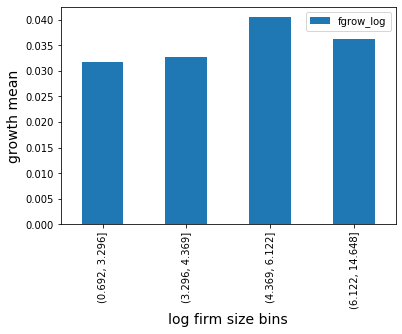

In [8]:
fq.plotbars(df3)

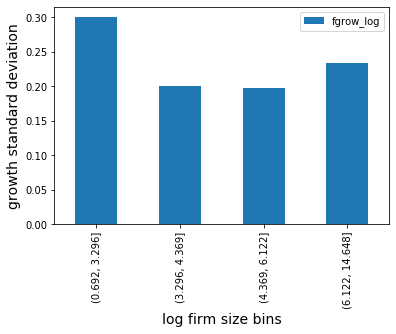

In [9]:
fq.plotbars(df4, ylabel='growth standard deviation')

## 2.2 PDFs for growth of firms in 4 bins above, respectively

The ``empirical func1`` shows the empirical PDF functions of firm growth for firms in **bin 1** above.

The ``empirical func2`` shows the empirical PDF functions of firm growth for firms in **bin 2** above.

The ``empirical func3`` shows the empirical PDF functions of firm growth for firms in **bin 3** above.

The ``empirical func4`` shows the empirical PDF functions of firm growth for firms in **bin 4** above.

In [10]:
d1 = fq.generating_pdf(draw1)
d2 = fq.generating_pdf(draw2)
d3 = fq.generating_pdf(draw3)
d4 = fq.generating_pdf(draw4)

In [11]:
x1 = d1['fgrow_mean']
x2 = d2['fgrow_mean']
x3 = d3['fgrow_mean']
x4 = d4['fgrow_mean']

y1 = d1['prob']
y2 = d2['prob']
y3 = d3['prob']
y4 = d4['prob']

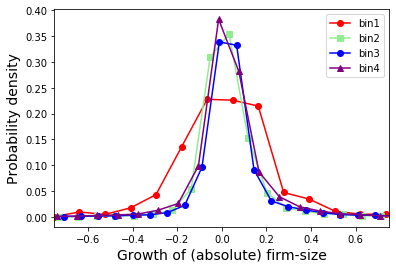

In [12]:
fq.density_plot(x1, x2, x3, x4, y1, y2, y3, y4)

# 3 tail index

In [13]:
s_dist1 = df.noe
s_dist2 = df.lognoe
s_dist3 = df.fgrow_log

The tail index for firm size distribution with firm size measured by number of employees is

In [14]:
fq.gabaix_est(s_dist1, c=0.01)  # top c * 100% 

1.764219102019077

The tail index for log firm size distribution with firm size measured by number of employees is

In [15]:
fq.gabaix_est(s_dist2, c=0.01)

21.191732898907574

The tail index for firm growth distribution with firm size measured by number of employees is

In [16]:
fq.gabaix_est(s_dist3, c=0.01)

2.427810923328104